## EDA - Telco Churn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
telco_df = pd.read_csv('../data/processed/telco_churn.csv')
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,0,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,0,74.40,306.6,1


## Churn rate

### General

In [45]:
counts = telco_df['Churn'].value_counts()
labels = ['No Churn', 'Churn']
sizes = [counts[0], counts[1]]
sizes

[np.int64(5174), np.int64(1869)]

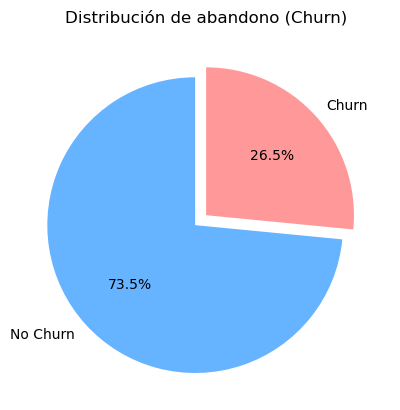

In [7]:
fig, ax = plt.subplots()
ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn)')
plt.show()

 - Churn Rate general del 26.5%, de más de 7000 clientes 1869 abandonan

### Por servicio

#### Phone Service

In [8]:
phone_df = pd.read_csv('../data/processed/phone_service.csv')
phone_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7469-LKBCI,1,0,0,0,16,1,0,2,0,1,18.95,326.8,0
1,8191-XWSZG,0,0,0,0,52,1,0,1,0,0,20.65,1022.95,0
2,1680-VDCWW,1,0,1,0,12,1,0,1,0,1,19.80,202.25,0
3,1066-JKSGK,1,0,0,0,1,1,0,0,0,0,20.15,20.15,1
4,7310-EGVHZ,1,0,0,0,1,1,0,0,0,1,20.20,20.2,0


In [9]:
p_counts = phone_df['Churn'].value_counts()
p_labels = labels
p_sizes = [p_counts[0], p_counts[1]]

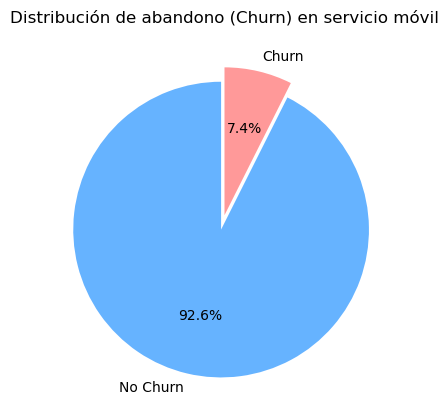

In [10]:
fig, ax = plt.subplots()
ax.pie(
    p_sizes, 
    labels=p_labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en servicio móvil')
plt.show()

 - El servicio telefonico no es un problema ya que dentro de su subconjunto el abandono representa el 7%

#### Internet Service

In [11]:
internet_df = pd.read_csv('../data/processed/internet_service.csv')
internet_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,7795-CFOCW,1,0,0,0,45,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
2,6713-OKOMC,0,0,0,0,10,1,1,0,0,0,0,0,0,0,0,29.75,301.9,0
3,8779-QRDMV,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,39.65,39.65,1
4,8665-UTDHZ,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,30.20,30.2,1


In [12]:
i_counts = internet_df['Churn'].value_counts()
i_labels = labels
i_sizes = [i_counts[0], i_counts[1]]

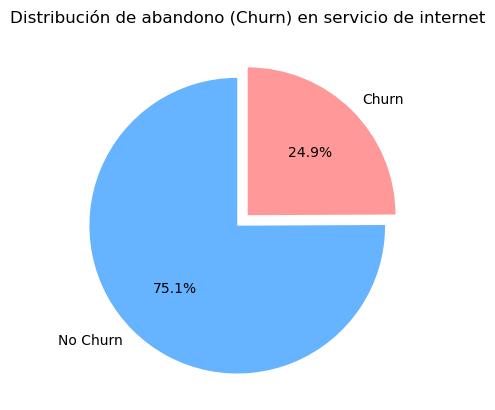

In [13]:
fig, ax = plt.subplots()
ax.pie(
    i_sizes, 
    labels=i_labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en servicio de internet')
plt.show()

- Tasa de abandono el 25%, por lo tanto hay que intentar potenciar este servicio o intentar hacer que se deriven a otros. Añadir internet + otras cosas

#### Both Services

In [14]:
both_df = pd.read_csv('../data/processed/phone_internet_service.csv')
both_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
1,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
2,6388-TABGU,1,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,1,56.15,3487.95,0
3,9763-GRSKD,1,0,1,1,13,1,0,1,1,0,0,0,0,0,0,1,0,49.95,587.45,0
4,4190-MFLUW,0,0,1,1,10,1,0,1,0,0,1,1,0,0,0,0,1,55.20,528.35,1


In [15]:
b_counts = both_df['Churn'].value_counts()
b_labels = labels
b_sizes = [b_counts[0], b_counts[1]]

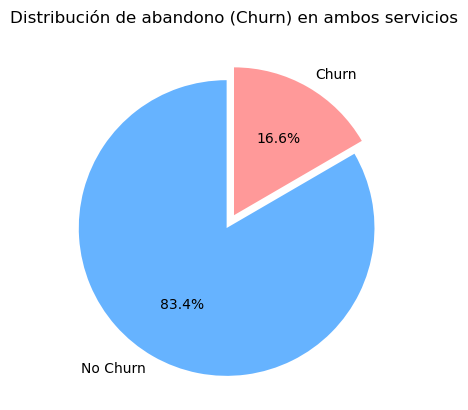

In [16]:
fig, ax = plt.subplots()
ax.pie(
    b_counts,
    labels = b_labels,
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en ambos servicios')
plt.show()

- Cuando se hace contratación conjunta de telefono e internet la tasa de abandono baja al 16%

### Senior vs Churn

In [17]:
senior_df = telco_df[telco_df['SeniorCitizen'] == 1]
senior_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,39.65,39.65,1
30,3841-NFECX,0,1,1,0,71,1,1,2,1,1,1,1,0,0,2,1,1,96.35,6766.95,0
31,4929-XIHVW,1,1,1,0,2,1,0,2,0,0,1,0,1,1,0,1,1,95.50,181.65,0
34,3413-BMNZE,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,45.25,45.25,0
50,8012-SOUDQ,0,1,0,0,43,1,1,2,0,1,0,0,1,0,0,1,0,90.25,3838.75,0


In [18]:
counts = senior_df['Churn'].value_counts()
labels = ['Churn', 'No churn']
sizes = [counts[0], counts[1]]


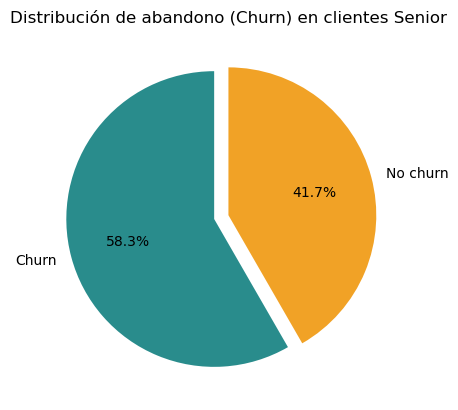

In [19]:
fig, ax = plt.subplots()
ax.pie(
    counts,
    labels = labels,
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#298C8C','#F1A226'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en clientes Senior')
plt.show()

- Clientes senior, propensos a no contratar servicios extra son los clientes con mayor churn rate, 58%. Se les deberia estudiar mejor para ver causas.

### Gender vs Churn

In [20]:
female_df = telco_df[telco_df['gender'] == 0]
male_df = telco_df[telco_df['gender'] == 1]

In [21]:
labels = ['No churn', 'Churn']
female_counts = female_df['Churn'].value_counts()
male_counts = male_df['Churn'].value_counts()

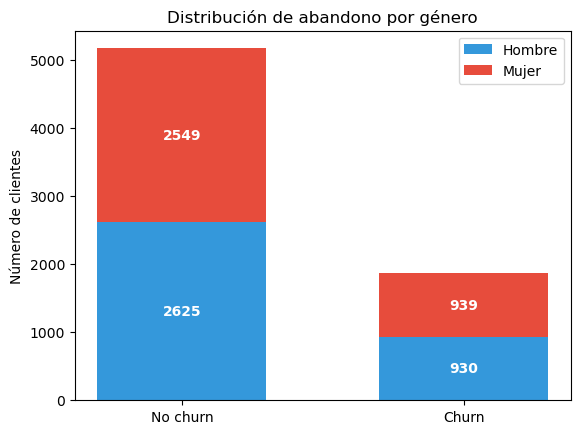

In [22]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    male_counts,
    width,
    label = 'Hombre', 
    color = '#3498db'
)
ax.bar(
    labels,
    female_counts, 
    width,
    bottom= male_counts,
    label = 'Mujer',
    color = '#e74c3c'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono por género')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- Tasa de generos equilibrada

### ¿El churn es más alto en contratos mensuales que en anuales?

In [23]:
month_df = telco_df[telco_df['Contract'] == 0]
year_df = telco_df[(telco_df['Contract'] == 1) | (telco_df['Contract'] == 2)]

In [24]:
labels = ['Mensual', 'Anual']
month_counts = month_df['Churn'].value_counts()
year_counts = year_df['Churn'].value_counts()

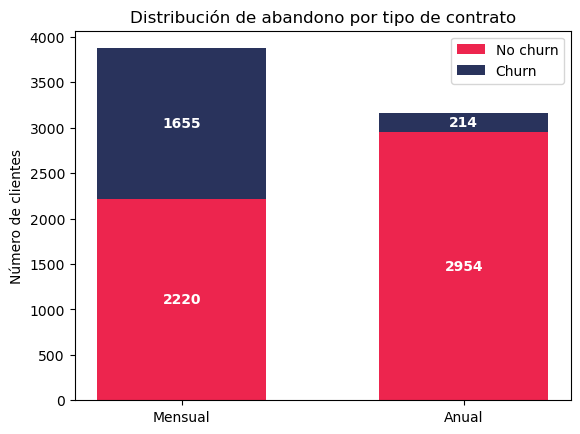

In [25]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [month_counts[0], year_counts[0]],
    width,
    label = 'No churn', 
    color = '#ED254E'
)
ax.bar(
    labels,
    [month_counts[1], year_counts[1]], 
    width,
    bottom= [month_counts[0], year_counts[0]],
    label = 'Churn',
    color = '#29335C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono por tipo de contrato')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- El número de contratos anuales que no abandonan son mayores y la tasa de abandono es muy baja a comparación con el mensual

### ¿El churn es mayor en clientes con alta MonthlyCharges?

### Pago mensual

In [26]:
month_df['MonthlyCharges'].describe()

count    3875.000000
mean       66.398490
std        26.926599
min        18.750000
25%        45.850000
50%        73.250000
75%        88.875000
max       117.450000
Name: MonthlyCharges, dtype: float64

In [27]:
labels = [f'Bajo {round(month_df['MonthlyCharges'].mean(), 2)}', f'Sobre {round(month_df['MonthlyCharges'].mean(), 2)}']
less_counts = month_df[month_df['MonthlyCharges'] < month_df['MonthlyCharges'].mean()]['Churn'].value_counts()
over_counts = month_df[month_df['MonthlyCharges'] > month_df['MonthlyCharges'].mean()]['Churn'].value_counts()

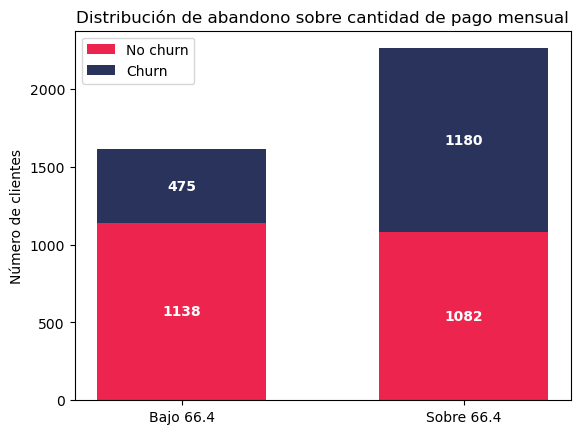

In [28]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [less_counts[0], over_counts[0]],
    width,
    label = 'No churn', 
    color = '#ED254E'
)
ax.bar(
    labels,
    [less_counts[1], over_counts[1]], 
    width,
    bottom= [less_counts[0], over_counts[0]],
    label = 'Churn',
    color = '#29335C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre cantidad de pago mensual')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- Clientes mensuales que pagan sobre la media tienden a abandonar más del 50%

### Pago anual

In [29]:
year_df['MonthlyCharges'].describe()

count    3168.000000
mean       62.759612
std        33.452114
min        18.250000
25%        24.550000
50%        65.600000
75%        92.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [30]:
labels = [f'Bajo {round(year_df['MonthlyCharges'].mean(), 2)}', f'Sobre {round(year_df['MonthlyCharges'].mean(), 2)}']
less_counts = year_df[year_df['MonthlyCharges'] < year_df['MonthlyCharges'].mean()]['Churn'].value_counts()
over_counts = year_df[year_df['MonthlyCharges'] > year_df['MonthlyCharges'].mean()]['Churn'].value_counts()

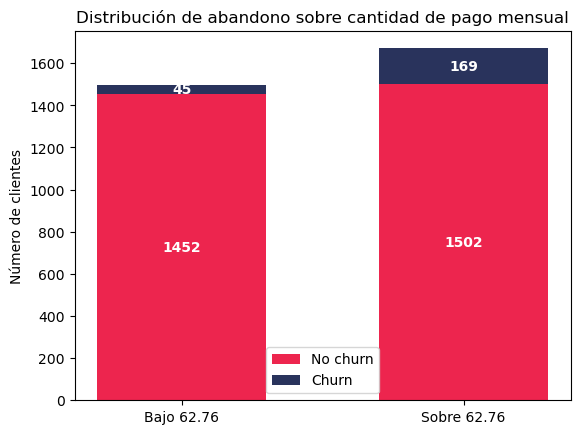

In [31]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [less_counts[0], over_counts[0]],
    width,
    label = 'No churn', 
    color = '#ED254E'
)
ax.bar(
    labels,
    [less_counts[1], over_counts[1]], 
    width,
    bottom= [less_counts[0], over_counts[0]],
    label = 'Churn',
    color = '#29335C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre cantidad de pago mensual')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- Clientes anuales que pagan encima de la media tienden a abandonar más pero no es preocupante

### ¿Tenure bajo = churn alto?

In [32]:
telco_df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [33]:
labels = ['Bajo 11', 'Sobre 11']
t_less_counts = telco_df[telco_df['tenure'] < 11]['Churn'].value_counts()
t_over_counts = telco_df[telco_df['tenure'] >= 11]['Churn'].value_counts()

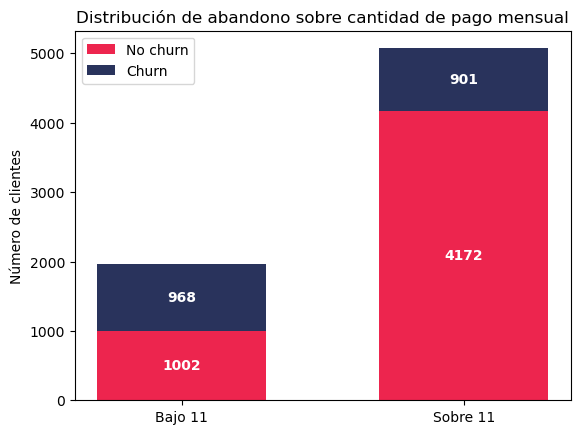

In [34]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [t_less_counts[0], t_over_counts[0]],
    width,
    label = 'No churn', 
    color = '#ED254E'
)
ax.bar(
    labels,
    [t_less_counts[1], t_over_counts[1]], 
    width,
    bottom= [t_less_counts[0], t_over_counts[0]],
    label = 'Churn',
    color = '#29335C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre cantidad de pago mensual')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

In [35]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [36]:
t_churn = telco_df.groupby(['tenure'])['Churn'].sum().to_frame().reset_index()
t_count = telco_df.groupby(['tenure'])['customerID'].count().to_frame().reset_index()

t = pd.merge(t_churn, t_count, on='tenure')

t.columns = ['tenure', 'churn_sum', 'customer_count']

t.head()

,tenure,churn_sum,customer_count
0,0,0,11
1,1,380,613
2,2,123,238
3,3,94,200
4,4,83,176


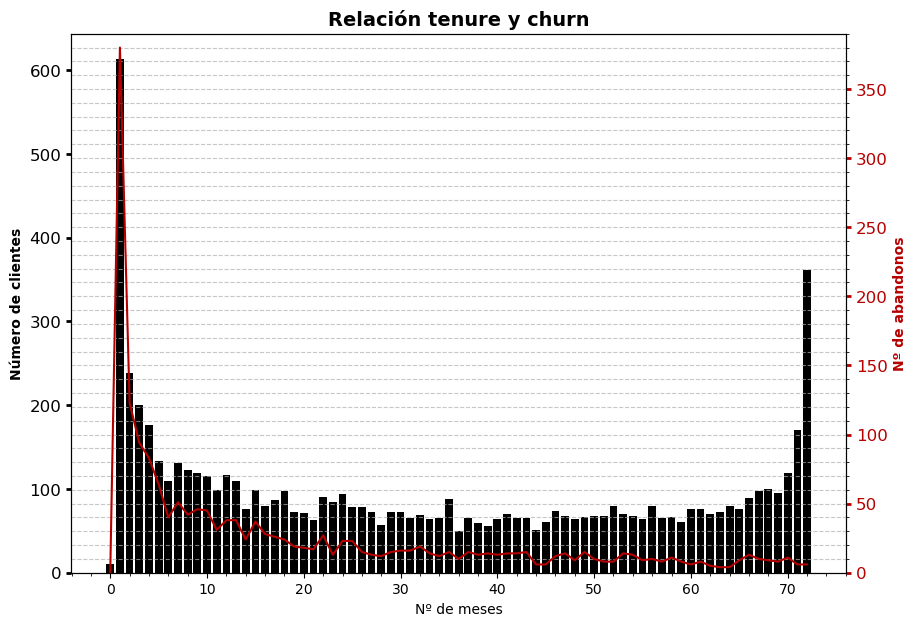

In [37]:
fig, ax = plt.subplots(figsize= (10,7))

ax.bar(
    t['tenure'],
    t['customer_count'],
    color = 'k'
)
ax.set_ylabel('Número de clientes', weight = 'bold')
ax.set_xlabel('Nº de meses')
ax.tick_params(axis = 'y', width = 2, labelsize = 'large')
ax.set_title('Relación tenure y churn', fontsize = 14, weight = 'bold')
ax1 = ax.twinx()
ax1.set_ylim(0, t['churn_sum'].max() +10)
ax1.plot(
    t['tenure'],
    t['churn_sum'],
    color = '#b60000',
)
ax1.set_ylabel('Nº de abandonos', weight = 'bold', color = '#b60000')
ax1.tick_params(axis = 'y', width = 2, labelsize = 'large', colors = '#b60000')
ax1.minorticks_on()
ax1.grid(which= 'major', axis='y', linestyle='--', alpha = 0.7)
ax1.grid(which = 'minor', axis='y', linestyle='--', alpha = 0.7)
plt.show()


### ¿Autopay reduce churn?

In [38]:
labels = ['Pago automático', 'Pago manual']
p_less_counts = telco_df[telco_df['PaymentMethod'] == 1]['Churn'].value_counts()
p_over_counts = telco_df[telco_df['PaymentMethod'] == 0]['Churn'].value_counts()

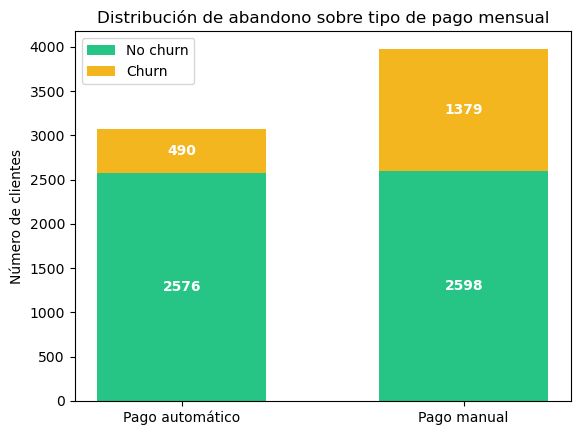

In [39]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [p_less_counts[0], p_over_counts[0]],
    width,
    label = 'No churn', 
    color = '#26C485'
)
ax.bar(
    labels,
    [p_less_counts[1], p_over_counts[1]], 
    width,
    bottom= [p_less_counts[0], p_over_counts[0]],
    label = 'Churn',
    color = '#F3B61F'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre tipo de pago mensual')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

### ¿Clientes con más servicios adicionales churnean menos?

In [40]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [41]:
services = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',	'TechSupport', 	'StreamingTV',	'StreamingMovies']

In [42]:
services_df = telco_df[telco_df[services].sum(axis=1) >= 4]
services_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,0,1,0,1,1,0,1,0,99.65,820.5,1
8,7892-POOKP,0,0,1,0,28,1,1,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
12,8091-TTVAX,1,0,1,0,58,1,1,2,0,0,1,0,1,1,1,0,1,100.35,5681.1,0
13,0280-XJGEX,1,0,0,0,49,1,1,2,0,1,1,0,1,1,0,1,1,103.70,5036.3,1
14,5129-JLPIS,1,0,0,0,25,1,0,2,1,0,1,1,1,1,0,1,0,105.50,2686.05,0


In [43]:
labels = ['Menos de 4 servicios', '4 servicios o más']
s_less_counts = telco_df[telco_df[services].sum(axis=1) < 4]['Churn'].value_counts()
s_over_counts = telco_df[telco_df[services].sum(axis=1) >= 4]['Churn'].value_counts()

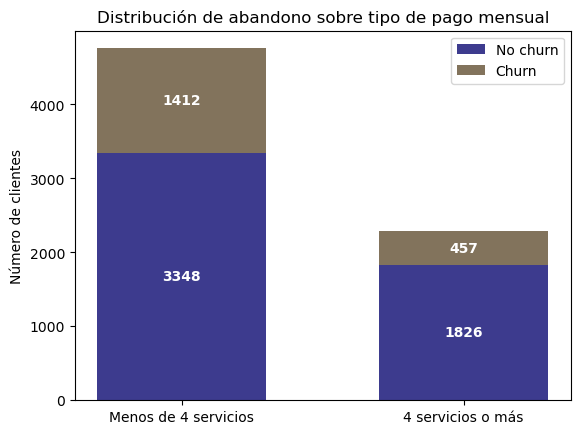

In [44]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [s_less_counts[0], s_over_counts[0]],
    width,
    label = 'No churn', 
    color = '#3D3B8E'
)
ax.bar(
    labels,
    [s_less_counts[1], s_over_counts[1]], 
    width,
    bottom= [s_less_counts[0], s_over_counts[0]],
    label = 'Churn',
    color = '#82735C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre tipo de pago mensual')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()